In [150]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import geopandas
import sklearn
import xyzservices.providers as xyz
from xyzservices import TileProvider
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [151]:
df = pd.read_csv('../cleaned_data.csv', sep=',')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   objectid_1           49140 non-null  int64  
 1   geometry             49140 non-null  object 
 2   zuj                  49140 non-null  object 
 3   alkohol_vinik        49140 non-null  object 
 4   hlavni_pricina       49140 non-null  object 
 5   srazka               49140 non-null  object 
 6   nasledky             49140 non-null  object 
 7   pricina              49140 non-null  object 
 8   stav_vozovky         49140 non-null  object 
 9   povetrnostni_podm    49140 non-null  object 
 10  rozhled              49140 non-null  object 
 11  misto_nehody         49140 non-null  object 
 12  druh_komun           49140 non-null  object 
 13  druh_vozidla         49140 non-null  object 
 14  mestska_cast         49140 non-null  object 
 15  pohlavi              49140 non-null 

In [153]:
df.isnull().sum()

objectid_1             0
geometry               0
zuj                    0
alkohol_vinik          0
hlavni_pricina         0
srazka                 0
nasledky               0
pricina                0
stav_vozovky           0
povetrnostni_podm      0
rozhled                0
misto_nehody           0
druh_komun             0
druh_vozidla           0
mestska_cast           0
pohlavi                0
alkohol                0
den_v_tydnu            0
mesic_t                0
katastr                0
nasledek               0
ozn_osoba              0
zavineni               0
viditelnost            0
situovani              0
osoba                  0
stav_ridic             0
doba                   0
lz                     0
den                    0
vek                    0
rok_nar                0
rok                    0
tz                     0
smrt                   0
lehce_zran_os          0
tezce_zran_os          0
usmrceno_os            0
id_vozidla             0
hodina                 0


In [154]:
df.describe()

,objectid_1,lz,den,vek,rok_nar,rok,tz,smrt,lehce_zran_os,tezce_zran_os,usmrceno_os,id_vozidla,hodina,ovlivneni_ridice,cas,mesic,e,d,id_nehody,hmotna_skoda_1,skoda_vozidlo,cluster_id,radius,id,feature_id,st_x,st_y,distance,rn,teplota_průměrná,teplota_maximální,teplota_minimální,rychlost_větru_,tlak_vzduchu,vlhkost_vzduchu,úhrn_srážek,celková_výška_sněhu,sluneční_svit,cars,trucks
count,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,4.914000e+04,49140.000000,4.914000e+04,4.914000e+04,4.914000e+04,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,4.914000e+04,49140.0,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000,49140.000000
mean,36187.685531,0.148657,3.711254,39.512312,1976.062821,2015.575132,0.012190,0.001119,0.529121,0.058954,0.005454,1.518641,14.321368,1.002727,1463.108812,6.650488,-1.160572e+06,-598272.475315,6.020227e+10,8.037451e+04,3.656082e+04,574.625193,0.007406,279.014856,287.470330,16.606232,49.196646,5.187230e-04,1.0,11.320287,15.792916,6.638907,3.503158,987.514758,70.541718,1.579457,0.408384,5.313954,19.025438,9.831909
std,19016.745884,0.355754,1.880904,15.935377,16.110674,3.522016,0.109733,0.033437,1.299361,0.475026,0.082264,0.618470,6.106940,0.173877,616.706025,3.335858,2.811613e+03,2867.122731,9.962385e+07,2.091286e+05,1.141163e+05,183.197416,0.005455,169.887025,170.822989,0.040527,0.024468,1.195011e-03,0.0,8.426495,9.696002,7.392364,1.572186,7.494037,14.197828,4.449528,2.160394,4.640323,16.264187,5.363423
min,4244.000000,0.000000,1.000000,0.000000,1914.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.169492e+06,-609768.000000,6.004010e+10,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,16.445719,49.118852,3.713816e-09,1.0,-14.500000,-12.100000,-18.300000,0.000000,948.900000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19970.250000,0.000000,2.000000,28.000000,1966.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000,1005.000000,4.000000,-1.162325e+06,-599625.000000,6.020612e+10,1.000000e+04,4.000000e+03,477.000000,0.003509,124.000000,121.000000,16.584306,49.182313,4.745006e-05,1.0,4.700000,8.200000,0.800000,2.300000,983.200000,60.000000,0.000000,0.000000,0.400000,7.000000,6.000000
50%,35545.000000,0.000000,4.000000,38.000000,1978.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.000000,1445.000000,7.000000,-1.160588e+06,-598295.000000,6.020615e+10,3.500000e+04,1.500000e+04,555.000000,0.005626,270.000000,291.000000,16.605106,49.196482,1.191833e-04,1.0,11.700000,16.500000,7.100000,3.300000,987.800000,71.000000,0.000000,0.000000,4.900000,13.000000,9.000000
75%,51247.250000,0.000000,5.000000,50.000000,1988.000000,2018.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,18.000000,1.000000,1840.000000,10.000000,-1.158759e+06,-596651.000000,6.020618e+10,9.900000e+04,4.000000e+04,619.000000,0.010433,429.000000,436.000000,16.628989,49.212562,4.878520e-04,1.0,18.100000,23.700000,12.600000,4.300000,992.200000,82.000000,0.800000,0.000000,9.300000,24.000000,11.000000
max,71216.000000,1.000000,7.000000,102.000000,2019.000000,2022.000000,1.000000,1.000000,29.000000,14.000000,3.000000,8.000000,25.000000,5.000000,2560.000000,12.000000,-1.149937e+06,-589870.000000,6.422523e+10,5.360000e+06,3.000000e+06,999.000000,0.030295,589.000000,589.000000,16.719047,49.292323,2.336082e-02,1.0,30.800000,37.800000,24.200000,12.000000,1015.000000,100.000000,69.000000,27.000000,15.500000,79.000000,90.000000


In [155]:
df.head()

,objectid_1,geometry,zuj,alkohol_vinik,hlavni_pricina,srazka,nasledky,pricina,stav_vozovky,povetrnostni_podm,rozhled,misto_nehody,druh_komun,druh_vozidla,mestska_cast,pohlavi,alkohol,den_v_tydnu,mesic_t,katastr,nasledek,ozn_osoba,zavineni,viditelnost,situovani,osoba,stav_ridic,doba,lz,den,vek,rok_nar,rok,tz,smrt,lehce_zran_os,tezce_zran_os,usmrceno_os,id_vozidla,hodina,ovlivneni_ridice,cas,mesic,e,d,id_nehody,datum,hmotna_skoda_1,skoda_vozidlo,globalid,cluster_id,centroid,radius,id,feature_id,geometry.1,datum_exportu,st_x,st_y,distance,rn,datum.1,teplota_průměrná,teplota_maximální,teplota_minimální,rychlost_větru_,tlak_vzduchu,vlhkost_vzduchu,úhrn_srážek,celková_výška_sněhu,sluneční_svit,cars,trucks
0,4244,POINT (16.578260337545 49.1610765338517),Brno-Bohunice,ne,nesprávný způsob jízdy,srážka s pevnou překážkou,nehoda pouze s hmotnou škodou,nezvládnutí řízení vozidla,povrch mokrý,déšť,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),osobní automobil bez přívěsu,Brno-Bohunice,muž,Ne,sobota,červen,Bohunice,bez zraněn,připoutaný bezpečnostními pásy (i na zadních sedadlech),řidičem motorového vozidla,"v noci - bez veřejného osvětlení, viditelnost zhoršená vlivem povětrnostních podmínek (mlha, déšť, sněžení apod.",na jízdním pruhu,řidič,dobrý -žádné nepříznivé okolnosti nebyly zjiště,noc,0,6,53.0,1957.0,2010,0,0,0,0,0,1.0,21,1.0,2160,6,-1164285,-600726,60040100039,2010-06-12,30000,20000,e353cde8-c64e-450f-82e3-11fd2d4f71de,408,POINT (16.578064781410745 49.16582023031229),0.010849,197,203,"LINESTRING (16.5995641 49.1598542, 16.5960346 49.1602958, 16.591774 49.1608164, 16.5882339 49.1612158, 16.5861001 49.1614087, 16.5838407 49.1614778, 16.5814527 49.161442, 16.5796637 49.1613147, 16.5773102 49.1610707, 16.5753926 49.1608384, 16.5731388 49.1606971, 16.5711291 49.1606689, 16.5689883 49.160727, 16.5668161 49.1609742, 16.5641095 49.1614515, 16.5612372 49.1622231, 16.5585448 49.1631416, 16.5558843 49.1640431, 16.5533135 49.1649319, 16.5500474 49.1659624, 16.5476201 49.166689, 16.5451566 49.1673525)",2025-02-26 00:00:00.000,16.578260,49.161077,0.000092,1,2010-06-12,22.1,30.5,16.7,3.0,979.8,75.0,17.1,0.0,13.4,66,22
1,4245,POINT (16.5990622085139 49.1599409787357),Brno-jih,ne,nesprávný způsob jízdy,srážka s jedoucím nekolejovým vozidlem,nehoda s následky na životě nebo zdraví,řidič se plně nevěnoval řízení vozidla,"povrch suchý, neznečistěný",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),nákladní automobil s přívěsem,Brno-jih,muž,Ne,čtvrtek,červenec,Horní Heršpice,bez zraněn,připoutaný bezpečnostními pásy (i na zadních sedadlech),řidičem motorového vozidla,"ve dne, viditelnost nezhoršená vlivem povětrnostních podmínek",na jízdním pruhu,"spolucestující na předním sedadle vedle řidiče nebo spolujezdec (cestující) na motocyklu, jízdním kole",dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,0,4,37.0,1973.0,2010,0,0,1,1,1,1.0,10,1.0,1055,7,-1164574,-599231,60040100049,2010-07-08,440000,50000,8c4d8f31-013d-4ea3-aff2-2c7339931a0e,477,POINT (16.599087612331633 49.15961170293254),0.012850,197,203,"LINESTRING (16.5995641 49.1598542, 16.5960346 49.1602958, 16.591774 49.1608164, 16.5882339 49.1612158, 16.5861001 49.1614087, 16.5838407 49.1614778, 16.5814527 49.161442, 16.5796637 49.1613147, 16.5773102 49.1610707, 16.5753926 49.1608384, 16.5731388 49.1606971, 16.5711291 49.1606689, 16.5689883 49.160727, 16.5668161 49.1609742, 16.5641095 49.1614515, 16.5612372 49.1622231, 16.5585448 49.1631416, 16.5558843 49.1640431, 16.5533135 49.1649319, 16.5500474 49.1659624, 16.5476201 49.166689, 16.5451566 49.1673525)",2025-02-26 00:00:00.000,16.599062,49.159941,0.000024,1,2010-07-08,20.2,26.2,10.8,1.7,993.4,54.0,0.0,0.0,15.0,66,22
2,4246,POINT (16.5990622085139 49.1599409787357),Brno-jih,ne,nesprávný způsob jízdy,srážka s jedoucím nekolejovým vozidlem,nehoda s následky na životě nebo zdraví,řidič se plně nevěnoval řízení vozidla,"povrch suchý, neznečistěný",neztížené,dobré,žádné nebo žádné 

In [156]:
df.columns

Index(['objectid_1', 'geometry', 'zuj', 'alkohol_vinik', 'hlavni_pricina',
       'srazka', 'nasledky', 'pricina', 'stav_vozovky', 'povetrnostni_podm',
       'rozhled', 'misto_nehody', 'druh_komun', 'druh_vozidla', 'mestska_cast',
       'pohlavi', 'alkohol', 'den_v_tydnu', 'mesic_t', 'katastr', 'nasledek',
       'ozn_osoba', 'zavineni', 'viditelnost', 'situovani', 'osoba',
       'stav_ridic', 'doba', 'lz', 'den', 'vek', 'rok_nar', 'rok', 'tz',
       'smrt', 'lehce_zran_os', 'tezce_zran_os', 'usmrceno_os', 'id_vozidla',
       'hodina', 'ovlivneni_ridice', 'cas', 'mesic', 'e', 'd', 'id_nehody',
       'datum', 'hmotna_skoda_1', 'skoda_vozidlo', 'globalid', 'cluster_id',
       'centroid', 'radius', 'id', 'feature_id', 'geometry.1', 'datum_exportu',
       'st_x', 'st_y', 'distance', 'rn', 'datum.1', 'teplota_průměrná',
       'teplota_maximální', 'teplota_minimální', 'rychlost_větru_',
       'tlak_vzduchu', 'vlhkost_vzduchu', 'úhrn_srážek', 'celková_výška_sněhu',
       'sluneční_

In [157]:
data = df.copy()
data['x'] = data['st_x']
data['y'] = data['st_y']
data = data[['x', 'y', 'datum', 'vek', 'úhrn_srážek']]
data['datum'] = pd.to_datetime(data['datum'])


mapping = {'muž': 0, 'žena': 1}
data['pohlavi'] = df['pohlavi'].map(mapping)

data.dropna()
data.head()

,x,y,datum,vek,úhrn_srážek,pohlavi
0,16.578260,49.161077,2010-06-12,53.0,17.1,0.0
1,16.599062,49.159941,2010-07-08,37.0,0.0,0.0
2,16.599062,49.159941,2010-07-08,38.0,0.0,0.0
3,16.599062,49.159941,2010-07-08,21.0,0.0,1.0
4,16.599062,49.159941,2010-07-08,54.0,0.0,1.0


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   x            49140 non-null  float64       
 1   y            49140 non-null  float64       
 2   datum        49140 non-null  datetime64[ns]
 3   vek          49140 non-null  float64       
 4   úhrn_srážek  49140 non-null  float64       
 5   pohlavi      47558 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.2 MB


In [159]:
gdf = geopandas.GeoDataFrame(
    data,
    geometry=geopandas.points_from_xy(data['x'], data['y']),
    crs="EPSG:5514"
)

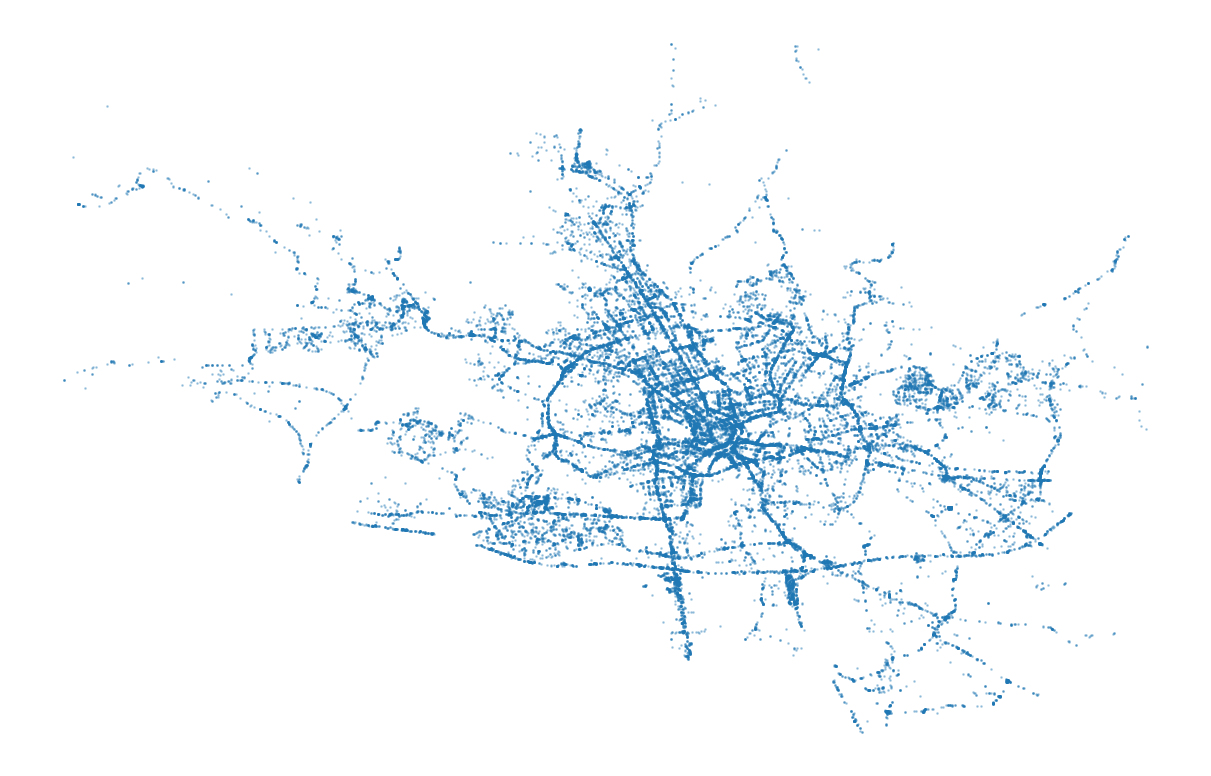

In [160]:
if True:
    fig, ax = plt.subplots(figsize=(12,8), constrained_layout=True)
    gdf.plot(ax=ax, markersize=1, alpha=0.3)
    #ctx.add_basemap(ax=ax, crs="EPSG:5514", source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_axis_off()
    plt.show()
    plt.close(fig)    

In [161]:
coords = np.column_stack((gdf.geometry.x, gdf.geometry.y))

n_clusters = 1000 # random...
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=42)
gdf['cluster'] = kmeans.fit(coords).labels_
gdf = gdf.to_crs(epsg=3857)

In [162]:
# Create polygons for each cluster
cluster_counts = gdf.groupby('cluster').size()
polygons = gdf.dissolve(by='cluster').geometry.convex_hull
polygon_gdf = geopandas.GeoDataFrame({'geometry': polygons, 'count': cluster_counts}, crs="EPSG:3857")

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=cluster_counts.min(), vmax=cluster_counts.max())

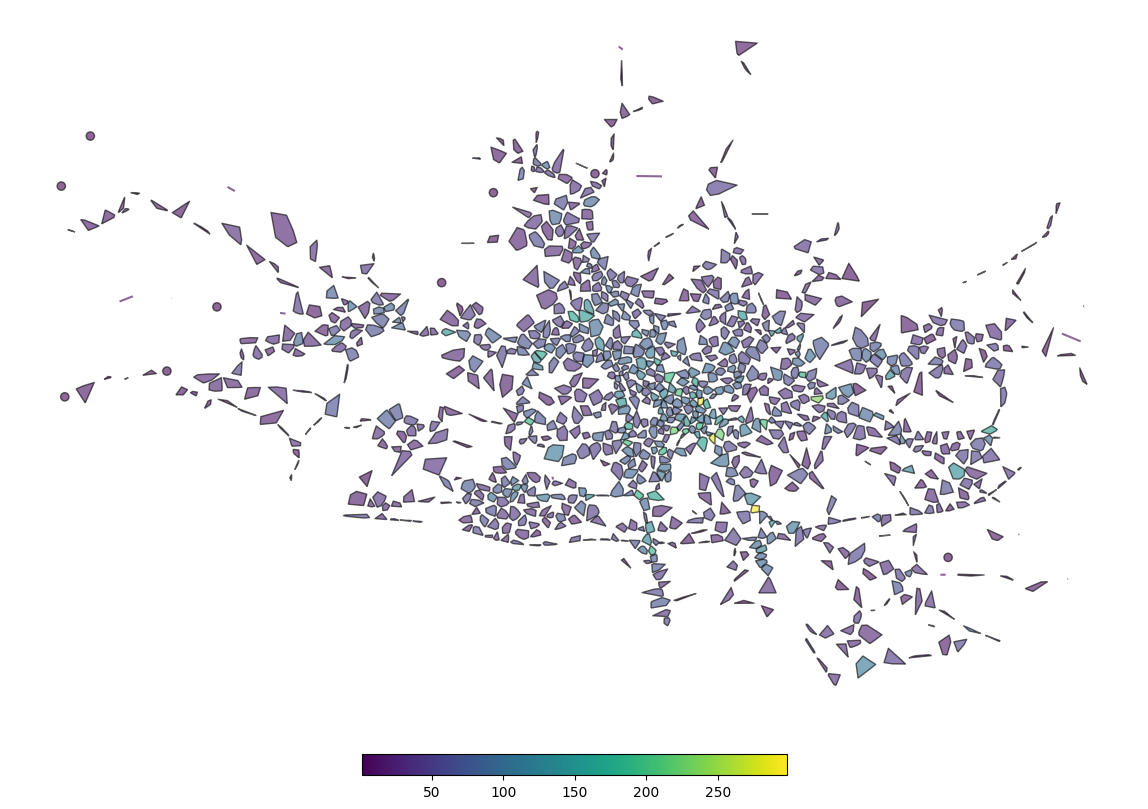

In [163]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)
    
polygon_gdf.plot(ax=ax, color=polygon_gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor="black", alpha=0.6)
#gdf.plot(ax=ax, markersize=5, color="white", alpha=0.7, edgecolor="black")
#ctx.add_basemap(ax=ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.05)

ax.set_axis_off()
plt.show()
plt.close(fig)


In [164]:
df_clean = data.dropna(subset=['pohlavi'])

num_men = (df_clean['pohlavi'] == 0).sum()
num_women = (df_clean['pohlavi'] == 1).sum()
total = num_men + num_women

prop_men = num_men / total
prop_women = num_women / total

observed = [num_men, num_women] 
# H0: assuming equal
expected = [total / 2, total / 2]

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
result_df = pd.DataFrame({
    "Category": ["Men", "Women"],
    "Observed accidents": observed,
    "Expected accidents (H₀)": expected,
    "Proportion": [prop_men, prop_women]
})

print(result_df)
print(p_value)


  Category  Observed accidents  Expected accidents (H₀)  Proportion
0      Men               33993                  23779.0    0.714769
1    Women               13565                  23779.0    0.285231
0.0


In [165]:
df_month = data.copy()
df_month['month'] = df_month['datum'].dt.month

all_months = range(1, 13)
accidents_per_month = df_month['month'].value_counts().reindex(all_months, fill_value=0).sort_index()

# H0: assuming uniform distribution
expected_counts = np.full(12, df_month.shape[0] / 12)  # Creates an array of 12 equal expected values

chi2_stat, p_value = stats.chisquare(f_obs=accidents_per_month, f_exp=expected_counts)

result_df = pd.DataFrame({
    "Month": all_months,
    "Observed Accidents": accidents_per_month.values,
    "Expected Accidents (H₀)": expected_counts
})

print(result_df)
print(p_value)


    Month  Observed Accidents  Expected Accidents (H₀)
0       1                3562                   4095.0
1       2                3344                   4095.0
2       3                3691                   4095.0
3       4                4136                   4095.0
4       5                4602                   4095.0
5       6                4655                   4095.0
6       7                3995                   4095.0
7       8                4221                   4095.0
8       9                4533                   4095.0
9      10                4681                   4095.0
10     11                3982                   4095.0
11     12                3738                   4095.0
1.3406790235431568e-112


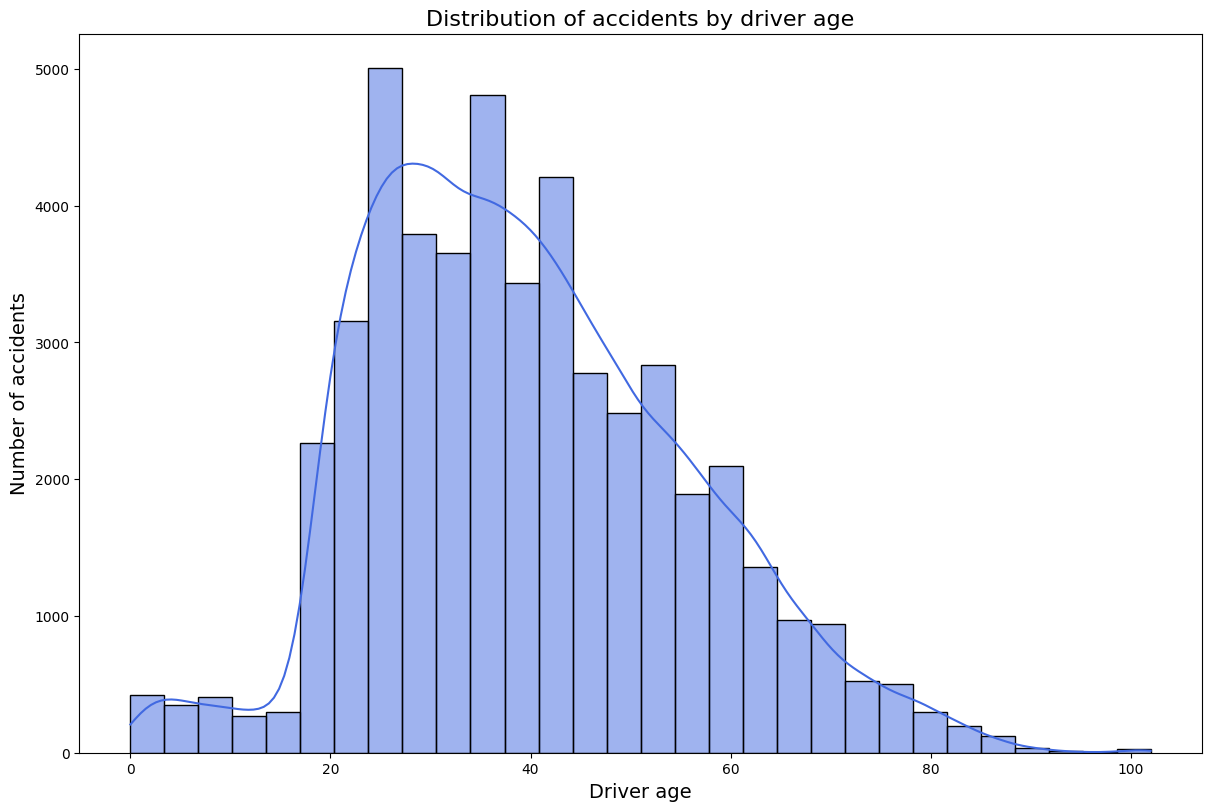

In [166]:
df_age = data.dropna(subset=['vek'])

fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)

sns.histplot(data=df_age, x='vek', bins=30, kde=True, color="royalblue", ax=ax)

plt.xlabel("Driver age", fontsize=14)
plt.ylabel("Number of accidents", fontsize=14)
plt.title("Distribution of accidents by driver age", fontsize=16)

plt.show()
plt.close(fig)

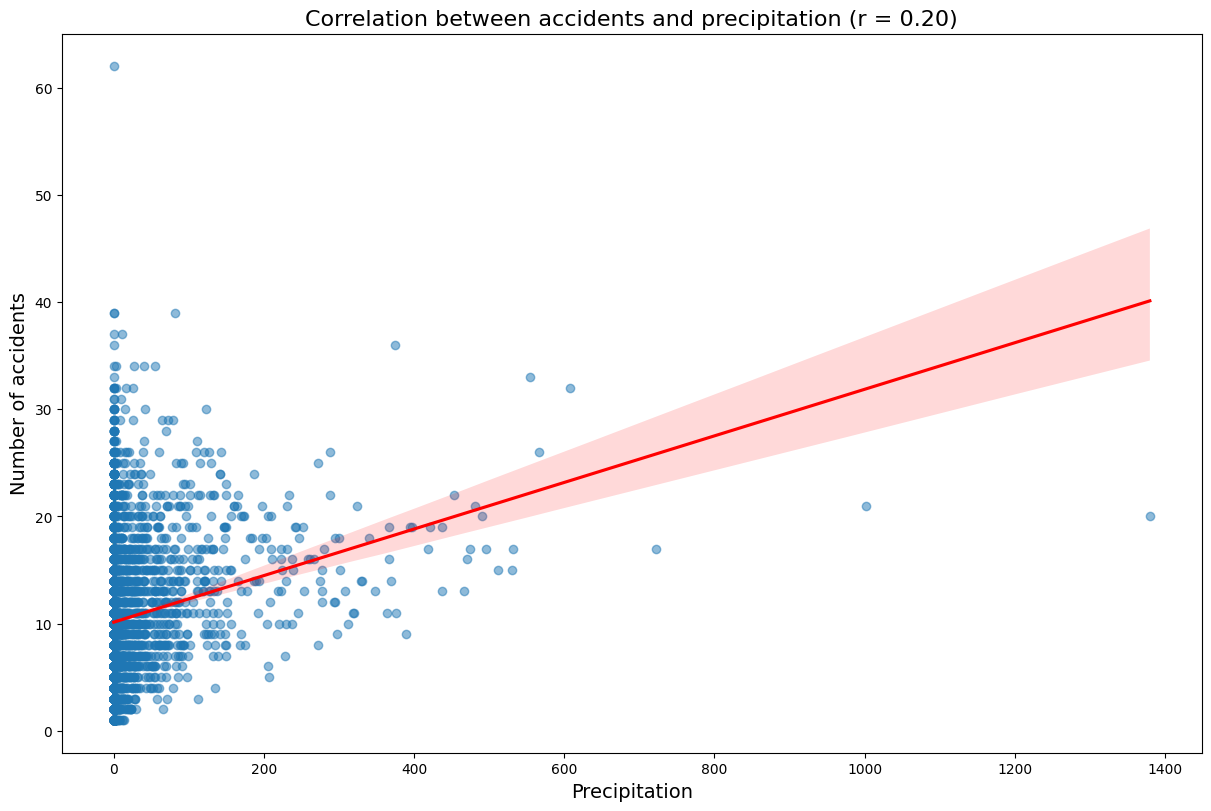

np.float64(0.20323610991480923)

In [168]:
df_daily = data.groupby('datum').agg(
    accident_count=('datum', 'count'),
    total_precipitation=('úhrn_srážek', 'sum')
).reset_index()

correlation = df_daily[['total_precipitation', 'accident_count']].corr().iloc[0, 1]
fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=true)
sns.regplot(data=df_daily, x='total_precipitation', y='accident_count', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})


plt.xlabel("precipitation", fontsize=14)
plt.ylabel("number of accidents", fontsize=14)
plt.title(f"correlation between accidents and precipitation (r = {correlation:.2f})", fontsize=16)

plt.show()
plt.close(fig)
correlation


In [169]:
import scipy.stats as stats

# Extract precipitation and accident count data
x = df_daily['total_precipitation']
y = df_daily['accident_count']

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Display results
correlation_coefficient, p_value

(np.float64(0.20323610991480817), np.float64(7.745272515065956e-45))